In [ ]:
import os
import pickle

import mediapipe as mp
import cv2
import matplotlib.pyplot as plt


mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)
DATA_DIR = './Gesture Image Data'

data = []
labels = []
for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        data_aux = []

        x_ = []
        y_ = []

        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
#converting image to RGB
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Process image and detect land handmark 
        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    x_.append(x)
                    y_.append(y)

                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x - min(x_))
                    data_aux.append(y - min(y_))

            data.append(data_aux)
            labels.append(dir_)

labels = list(map(int, labels))  # Konversi label ke integer
# data.pickle 
f = open('data.pickle', 'wb')
pickle.dump({'data': data, 'labels': labels}, f)
f.close()

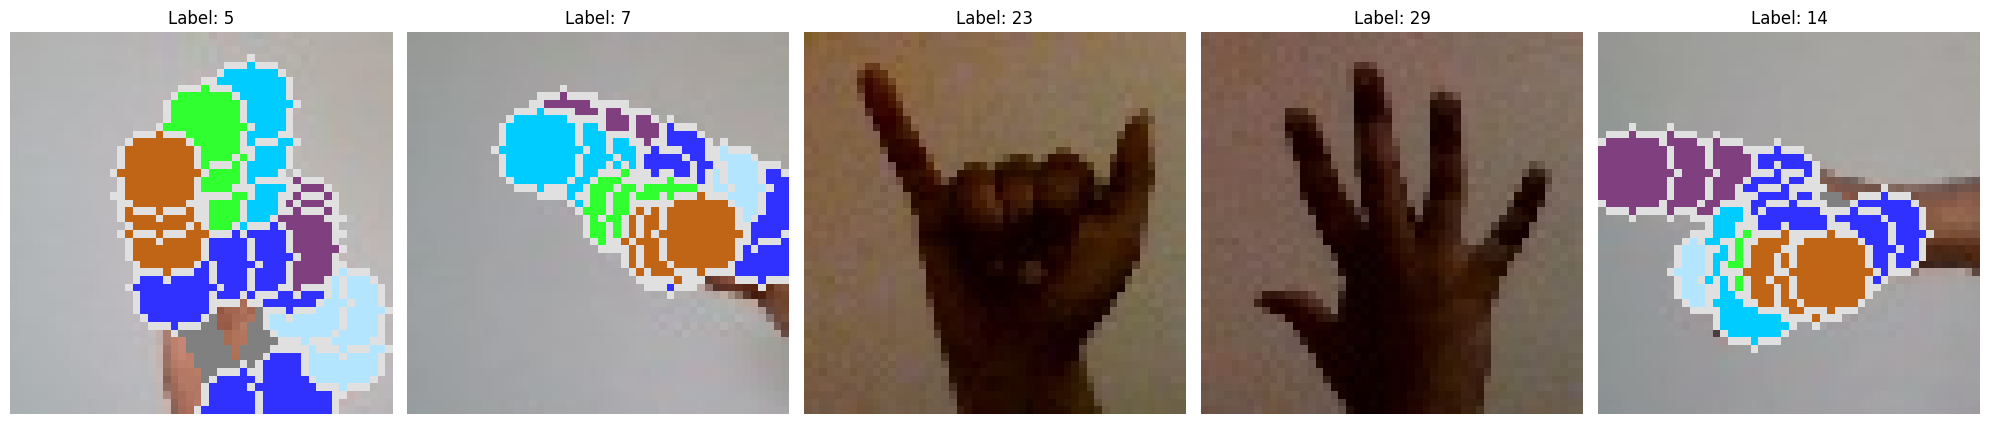

In [ ]:

import random
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

selected_indices = random.sample(range(len(data)), 2)

for i, idx in enumerate(selected_indices):
    dir_label = str(labels[idx])
    img_path_list = os.listdir(os.path.join(DATA_DIR, dir_label))
    img_path = os.path.join(DATA_DIR, dir_label, img_path_list[0])  

    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = hands.process(img_rgb)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                img_rgb,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())
    
    axs[i].imshow(img_rgb)
    axs[i].axis('off')
    axs[i].set_title(f'Label: {dir_label}')

plt.tight_layout()
plt.show()